Weight: 0 Fbeta Score Logistische Regression einzeln getuned: 0.0
Weight: 0 Fbeta Score Logistische Regression randomSearch getuned: 0.0
Weight: 1 Fbeta Score Logistische Regression einzeln getuned: 0.0032428466615931637
Weight: 1 Fbeta Score Logistische Regression randomSearch getuned: 0.004052603514828564
Weight: 2 Fbeta Score Logistische Regression einzeln getuned: 0.053409124910584506
Weight: 2 Fbeta Score Logistische Regression randomSearch getuned: 0.053640138183470375
Weight: 3 Fbeta Score Logistische Regression einzeln getuned: 0.2051862193569766
Weight: 3 Fbeta Score Logistische Regression randomSearch getuned: 0.19910889450615415
Weight: 4 Fbeta Score Logistische Regression einzeln getuned: 0.340116948555597
Weight: 4 Fbeta Score Logistische Regression randomSearch getuned: 0.33965216416721616
Weight: 5 Fbeta Score Logistische Regression einzeln getuned: 0.403213714296448
Weight: 5 Fbeta Score Logistische Regression randomSearch getuned: 0.40265657151953055
Weight: 6 Fbeta Sc

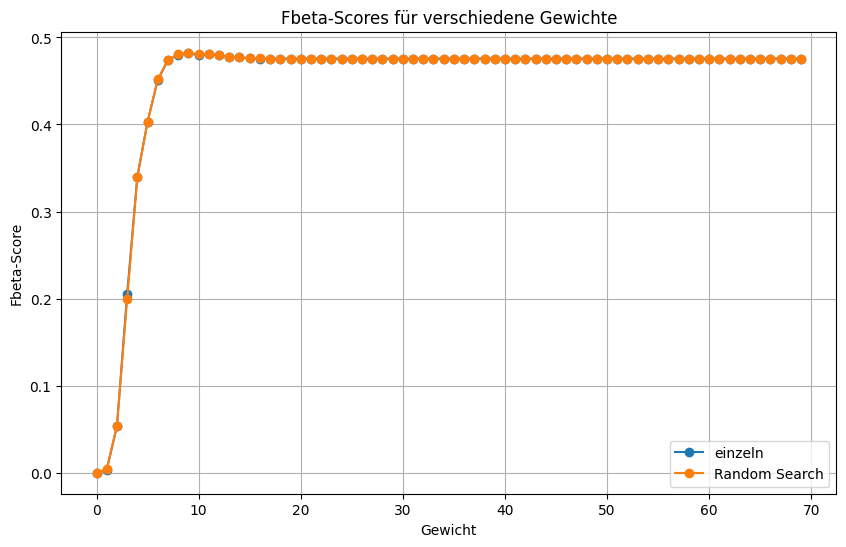

In [2]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import make_scorer, fbeta_score
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold

train_data_loaded = pd.read_csv('../data/train_data_2024-08-01.csv')

X = train_data_loaded.drop(columns=['UKATEGORIE'])
y = train_data_loaded['UKATEGORIE']


# KFold-Konfiguration
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# fbeta mit beta = 2
beta = 2
fbeta_scorer = make_scorer(fbeta_score, beta=beta)

import matplotlib.pyplot as plt

# Leere Listen für F1-Scores
f1_scores_log_reg_einzeln = []
f1_scores_log_reg_random = []

weights = range(0, 70)

for i in weights:
    # Logistische Regression einzeln getuned: 
    log_reg_einzeln = LogisticRegression(C=1, max_iter = 2000, tol = 0.001, random_state=42, class_weight={0:1, 1: i})

    # F1-Score berechnen und speichern
    f1_reg_einzeln = cross_val_score(log_reg_einzeln, X, y, cv=kf, scoring=fbeta_scorer)
    print(f"Weight: {i} Fbeta Score Logistische Regression einzeln getuned: { f1_reg_einzeln.mean()}")
    
    f1_scores_log_reg_einzeln.append(f1_reg_einzeln.mean())
    
    # Logistische Regression randomSearch getuned: 
    log_reg_random = LogisticRegression(C=1, max_iter=1700, penalty='l2', solver='liblinear', tol=0.0001, random_state=42, class_weight={0:1, 1: i})

    # F1-Score berechnen und speichern
    f1_reg_random = cross_val_score(log_reg_random, X, y, cv=kf, scoring=fbeta_scorer)
    print(f"Weight: {i} Fbeta Score Logistische Regression randomSearch getuned: { f1_reg_random.mean()}")
    
    f1_scores_log_reg_random.append(f1_reg_random.mean())

    
    
# F1-Scores plotten
plt.figure(figsize=(10, 6))
plt.plot(weights, f1_scores_log_reg_einzeln, marker='o', label='einzeln')
plt.plot(weights, f1_scores_log_reg_random, marker='o', label='Random Search')
plt.title('Fbeta-Scores für verschiedene Gewichte')
plt.xlabel('Gewicht')
plt.ylabel('Fbeta-Score')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
max_einzeln = max(f1_scores_log_reg_einzeln)
max_random = max(f1_scores_log_reg_random)
index_max = f1_scores_log_reg_einzeln.index(max_einzeln)
index_random = f1_scores_log_reg_random.index(max_random)
print(max_einzeln)
print(max_random)
print(index_max)
print(index_random)

0.4815773928311312
0.48240489744404214
9
9
